**Importing necessary libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation

**We load the dataset "Meteorite Landings" which contains information about meteorites that have landed on Earth.**

In [2]:
a = pd.read_csv("/kaggle/input/meteorite-landings/meteorite-landings.csv")
a    # exploring the rows and columns of the dataset

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


**The dataset provides details about the geographical coordinates, mass, classification, and other attributes of each meteorite.**

In [3]:
a.head()   # displays first 5 rows of the dataset

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


**Basic information about the dataset**

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
a.describe()      #statistical data

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


# Data Cleaning

In [6]:
a.isnull().sum()     #checking the count of null values in each column

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [7]:
a.loc[a["mass"].idxmax()]     #checking maximum and minimum values of mass to check the range

name                              Hoba
id                               11890
nametype                         Valid
recclass                     Iron, IVB
mass                        60000000.0
fall                             Found
year                            1920.0
reclat                       -19.58333
reclong                       17.91667
GeoLocation    (-19.583330, 17.916670)
Name: 16383, dtype: object

In [8]:
a.loc[a["mass"].idxmin()]

name                               Gove
id                                52859
nametype                         Relict
recclass                    Relict iron
mass                                0.0
fall                              Found
year                             1979.0
reclat                        -12.26333
reclong                       136.83833
GeoLocation    (-12.263330, 136.838330)
Name: 12627, dtype: object

In [9]:
a["mass"].fillna(a["mass"].median(), inplace=True)    #since the range is high, we use median to fill the NaN values

In [10]:
a["fall"].unique()  # returns the unique values of column "fall"

array(['Fell', 'Found'], dtype=object)

In [11]:
a["fall"]= a["fall"].astype("category")  # since we have only 2 unique valuies, we change it to "category" type

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         45716 non-null  object  
 1   id           45716 non-null  int64   
 2   nametype     45716 non-null  object  
 3   recclass     45716 non-null  object  
 4   mass         45716 non-null  float64 
 5   fall         45716 non-null  category
 6   year         45428 non-null  float64 
 7   reclat       38401 non-null  float64 
 8   reclong      38401 non-null  float64 
 9   GeoLocation  38401 non-null  object  
dtypes: category(1), float64(4), int64(1), object(4)
memory usage: 3.2+ MB


In [13]:
a.sort_values("id")    # sorting values according to the "id" column

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
1108,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,"(26.800000, -105.416670)"
1110,Abbott,5,Valid,H3-6,21100.0,Found,1951.0,36.30000,-104.28333,"(36.300000, -104.283330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
...,...,...,...,...,...,...,...,...,...,...
22890,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319,"(40.892010, -118.553190)"
3403,Antelope,57455,Valid,H4,754.0,Found,2012.0,40.90183,-118.54465,"(40.901830, -118.544650)"
30779,Northwest Africa 7870,57456,Valid,L4,42.0,Found,2004.0,0.00000,0.00000,"(0.000000, 0.000000)"
30780,Northwest Africa 7871,57457,Valid,L6,450.0,Found,2004.0,0.00000,0.00000,"(0.000000, 0.000000)"


In [14]:
a["id"].nunique()   # checking the count of unique values in "id" column

45716

In [15]:
mask= a.duplicated(subset = ["id","name","recclass","mass"])
a[mask]    #checking for duplicated values

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation


In [16]:
a.set_index("id")    #setting "id" column as the index

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"


# About the Dataset

**Average mass of meteorites:**

In [17]:
average_mass= a["mass"].mean()
print("The average mass of meteorites is:", average_mass)

The average mass of meteorites is: 13240.123397453846


**Number of rows and columns in the dataset:**

In [18]:
r=a.shape[0]
c=a.shape[1]
print("The number of rows and columns in the dataset is:", r, "x", c)

The number of rows and columns in the dataset is: 45716 x 10


**Meteorite with the highest recorded mass:**

In [19]:
max_mass = a.loc[a["mass"].idxmax()]
print(max_mass["name"], "has the maximum mass of", max_mass["mass"])

Hoba has the maximum mass of 60000000.0


# 1. Spatial Distribution of Meteorite Landings

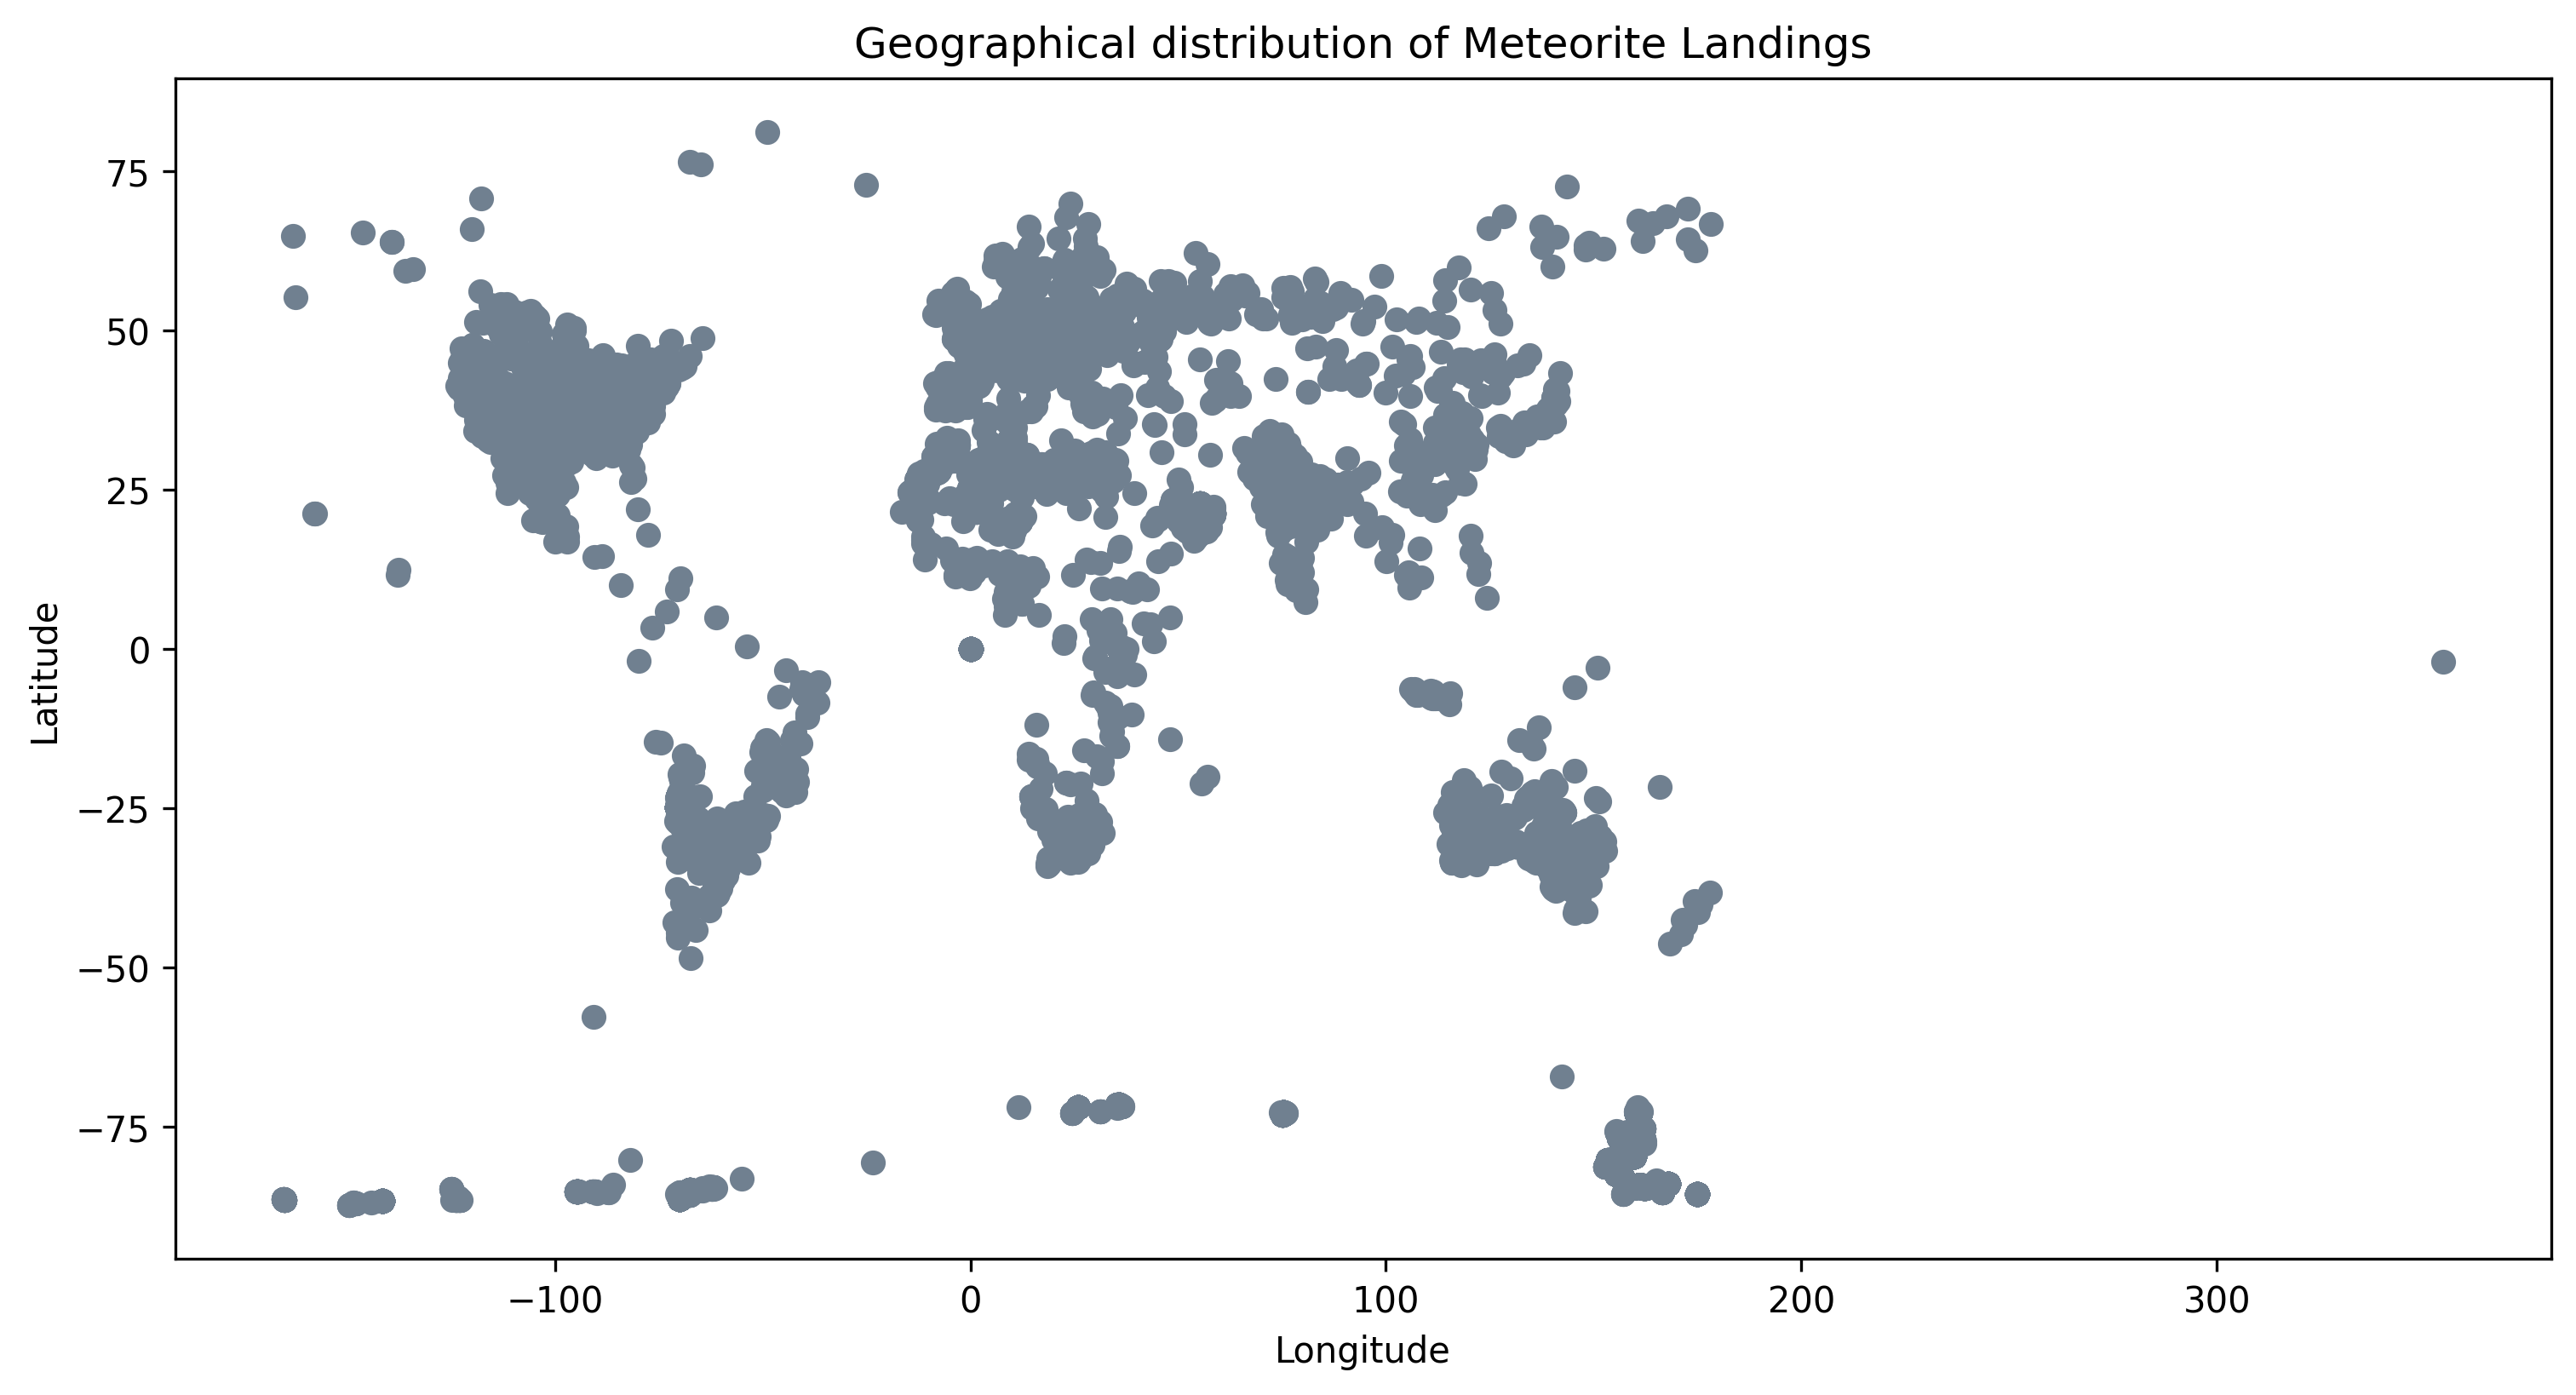

In [20]:
plt.figure(figsize=(12,6), dpi=300)
plt.scatter(x= "reclong", y="reclat", data=a, color="slategrey")
plt.title("Geographical distribution of Meteorite Landings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Findings of (1):
* High-Density Areas: Clusters of points indicate regions with more recorded meteorite falls.
* Outliers: An isolated point on the plot represent unusual meteorite landings.

# 2. Mass Distribution

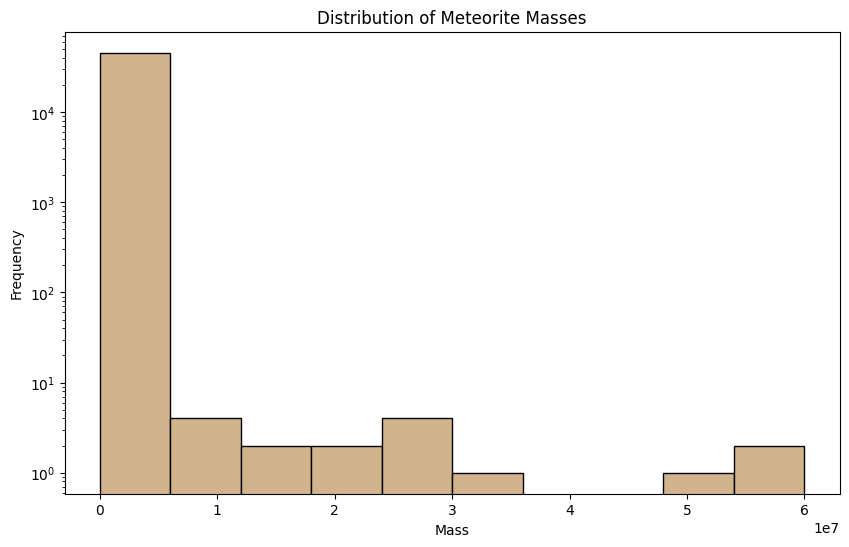

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(a["mass"], color= "tan", log= True, edgecolor="black")        # mass- here,scientific computing. log=True because the data has a wide range of mass values
plt.title('Distribution of Meteorite Masses')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.legend
plt.show()

Findings of (2):
* The highest bars in the histogram represent mass ranges where meteorites are more common.
* There are be a few meteorites with extremely high masses indicated by the last few bars


# 3. Top Meteorite Types

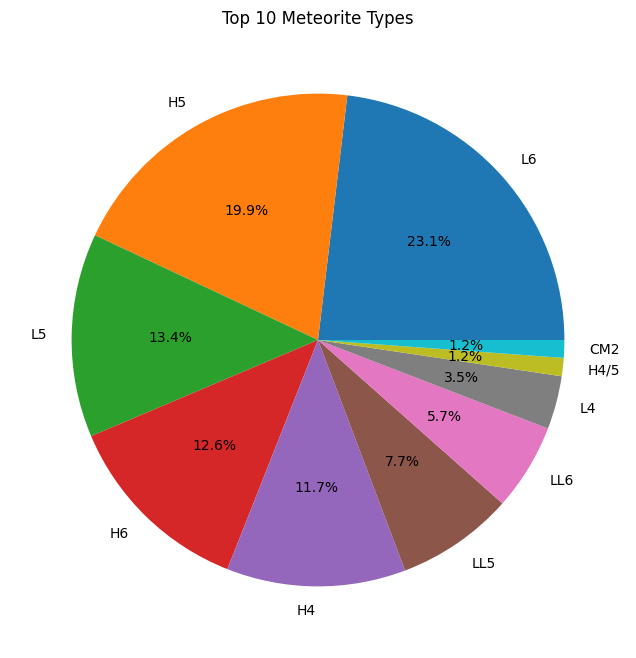

In [22]:
mtypes = a["recclass"].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(mtypes, autopct='%.1f%%', labels= mtypes.index)
plt.title("Top 10 Meteorite Types")
plt.show()

Findings in (3):
* We have focused on the top 10 meteorite types, providing a concise overview of the most common types in our dataset.
* Top 5 are the most dominant ones in the dataset ie., L6, H5, L5, H6 & H4.
* The percentages displayed on the pie chart shows the relative frequency of each meteorite type among the top 10.

# 4. Fell vs Found Meteorites

In [23]:
a["fall"].value_counts()     #Counts the number of meteorites that fell and were found

fall
Found    44609
Fell      1107
Name: count, dtype: int64

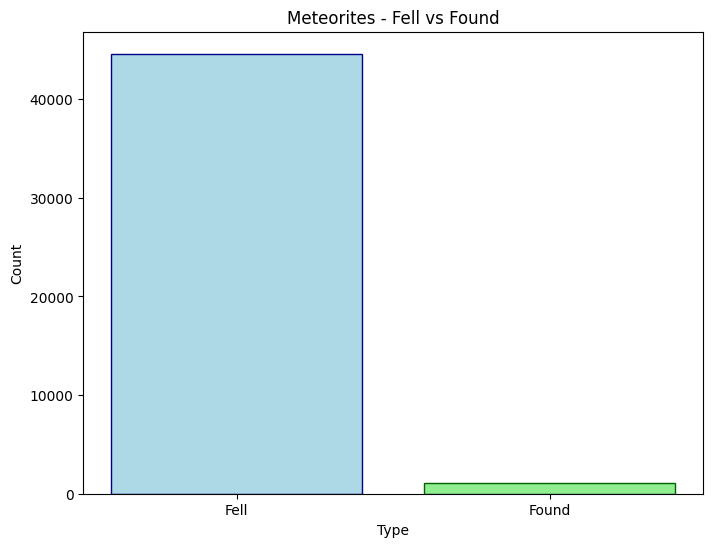

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(["Fell","Found"], a["fall"].value_counts(), color=["lightblue", "lightgreen"], edgecolor= ["darkblue", "darkgreen"])
plt.title('Meteorites - Fell vs Found')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Findings in (4):
* The count of "fell" category is significantly higher than that of the "found" category.
* "fell" category is approximately 40 times the "found" category


# 5. Top 10 Locations with the Most Recorded Meteorite Landings

In [25]:
top_locations = a["GeoLocation"].value_counts().nlargest(10)
print(top_locations)

GeoLocation
(0.000000, 0.000000)        6214
(-71.500000, 35.666670)     4761
(-84.000000, 168.000000)    3040
(-72.000000, 26.000000)     1505
(-79.683330, 159.750000)     657
(-76.716670, 159.666670)     637
(-76.183330, 157.166670)     539
(-79.683330, 155.750000)     473
(-84.216670, 160.500000)     263
(-86.366670, -70.000000)     226
Name: count, dtype: int64


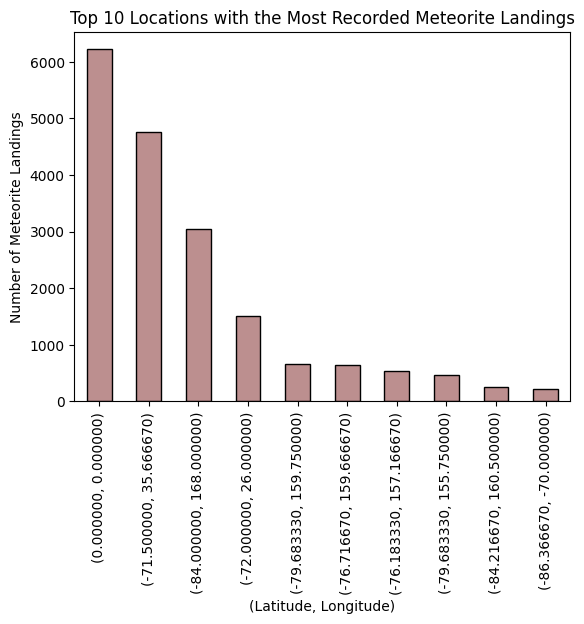

In [26]:
top_locations.plot(kind="bar", color="rosybrown", edgecolor="black")
plt.title("Top 10 Locations with the Most Recorded Meteorite Landings")
plt.xlabel("(Latitude, Longitude)")
plt.ylabel("Number of Meteorite Landings")
plt.show()

Findinga in (5):
* The maximum meteorite landing is actually in latitude-longitude (0,0), ie., the location is probably unknown.
* The top 10 recorded landings ranges from approximately 200 to 6200

# Conclusion
The analysis of the "Meteorite Landings" dataset provides insights into the geographical distribution and characteristics of recorded meteorite falls.
After cleaning the data and describing the data briefly, we have done detailed analysis on:
1. Spatial Distribution of Meteorite Landings
2. Mass Distribution
3. Top Meteorite Types
4. Fell vs Found Meteorites
5. Top 10 Locations with the Most Recorded Meteorite Landings